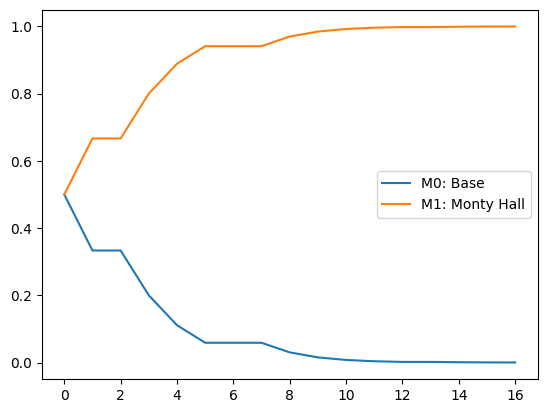

<ipython-input-5-3df83933aad2>:158: RuntimeWarning: invalid value encountered in divide
  pM_Datos = [pDatosM[0]/pDatos, # P(M0|Datos)
<ipython-input-5-3df83933aad2>:159: RuntimeWarning: invalid value encountered in divide
  pDatosM[1]/pDatos, # P(M1|Datos)
<ipython-input-5-3df83933aad2>:160: RuntimeWarning: invalid value encountered in divide
  pDatosM[2]/pDatos] # P(M2|Datos)


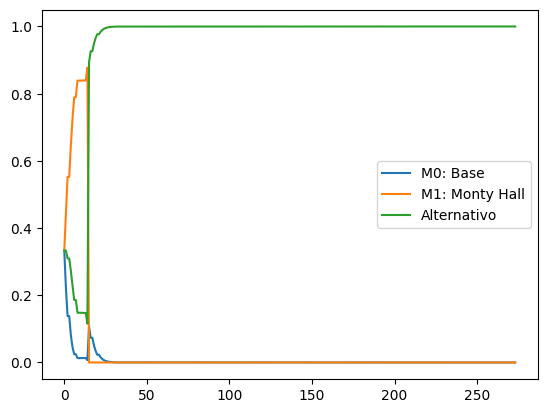

Primer dato en invalidar al modelo Monty Hall es: ['0', '0', '2']
Y el modelo alternativo pega un salto de: 0.7782753616934078


In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import csv
from matplotlib import pyplot as plt

def pr(r):
    return 1/3

def pc(c):
    return 1/3

def ps_rM0(s,r):
    return (s!=r) * 1/2

def ps_rcM1(s,r,c):
    if r!=c:
        return (s!=r) * (s!=c) * 1
    else:
        return (s!=r) * 1/2


def prcs_M(r,c,s,m):
    if m==0:
        return pr(r)*pc(c)*ps_rM0(s,r)
    if m==1:
        return pr(r)*pc(c)*ps_rcM1(s,r,c)


H = np.arange(3) # Posibles valores de las hipótesis


def ps_cM(s,c,m):
    num = 0
    den = 0
    for hr in H:
        num += prcs_M(hr,c,s,m)
        for hs in H:
            den += prcs_M(hr,c,hs,m)
    return num/den

def pr_csM(r,c,s,m):
    num = prcs_M(r,c,s,m)
    den = 0
    for hr in H:
        den += prcs_M(hr,c,s,m)
    return num/den

def pEpisodio_M(c,s,r,m):
    return prcs_M(r,c,s,m)


def simular(T=16,seed=0):
    np.random.seed(seed)
    Datos = []
    for t in range(T):
        r = np.random.choice(3, p=[pr(hr) for hr in H])
        c = np.random.choice(3, p=[pc(hc) for hc in H])
        s = np.random.choice(3, p=[ps_rcM1(hs,r,c) for hs in H])
        Datos.append((c,s,r))
    return Datos

T =16
Datos = simular()

def secuencia_de_predicciones(Datos,m):
    pDatos_M = [1]
    for t in range(len(Datos)):
        c, s, r = Datos[t]
        pDatos_M.append(pEpisodio_M(c,s,r,m))
    return pDatos_M

def pDatos_M(Datos, m):
    return np.prod(secuencia_de_predicciones(Datos,m))

pDatos_M(Datos, m=0)
pDatos_M(Datos, m=1)

# 1.5

log_evidencia_M0 = np.log10(pDatos_M(Datos, m=0))
log_evidencia_M1 = np.log10(pDatos_M(Datos, m=1))

# Diferencia en ordenes de magnitud
log_evidencia_M1 - log_evidencia_M0 # 3.612359

# Cantidad de creencia que preserva un modelo respecto del otro
10**(log_evidencia_M1 - log_evidencia_M0) # 4095.99

# Predicción típica (media geométrica)
10**(log_evidencia_M1/(len(Datos)*3)) # 0.4537
10**(log_evidencia_M0/(len(Datos)*3)) # 0.3815

# 1.6

def pM(m):
    return (1/2)

pDatos_M0 = secuencia_de_predicciones(Datos,m=0)
pDatos_M1 = secuencia_de_predicciones(Datos,m=1)

pDatosM = [np.cumprod(pDatos_M0) * pM(0), # P(Datos,M0)
           np.cumprod(pDatos_M1) * pM(1)] # P(Datos,M1)
pDatos = pDatosM[0] + pDatosM[1]

# 1.7

pM_Datos = [pDatosM[0]/pDatos, # P(M0|Datos)
            pDatosM[1]/pDatos] # P(M1|Datos)

#1.8

plt.plot(pM_Datos[0], label="M0: Base")
plt.plot(pM_Datos[1], label="M1: Monty Hall")
plt.legend()
plt.show()

#
# 1.9


def prcs_M(r,c,s,m):
    if m==0:
        return pr(r)*pc(c)*ps_rM0(s,r)
    if m==1:
        return pr(r)*pc(c)*ps_rcM1(s,r,c)
    if m==2:
        res = 0
        for a in [0,1]:
            for p in np.arange(0,1,0.001):
                res = res + pr(r)*pc(c)*(ps_rM0(s,r)*(a==0)+ps_rcM1(s,r,c)*(a!=0))*p*1/1000
        return res

def secuencia_de_predicciones(Datos,m):
    pDatos_M = [1]
    for t in range(len(Datos)):
        c, s, r = Datos[t]
        pDatos_M.append(pEpisodio_M(c,s,r,m))
    return pDatos_M

with open("NoMontyHall.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    Datos = list(reader)

def pM(m):
    return (1/3)

pDatos_M0 = secuencia_de_predicciones(Datos,m=0)
pDatos_M1 = secuencia_de_predicciones(Datos,m=1)
pDatos_M2 = secuencia_de_predicciones(Datos,m=2)
pDatosM = [np.cumprod(pDatos_M0) * pM(0), # P(Datos,M0)
           np.cumprod(pDatos_M1) * pM(1), # P(Datos,M1)
           np.cumprod(pDatos_M2) * pM(2)] # P(Datos,M2)
pDatos = pDatosM[0] + pDatosM[1] + pDatosM[2]


pM_Datos = [pDatosM[0]/pDatos, # P(M0|Datos)
            pDatosM[1]/pDatos, # P(M1|Datos)
            pDatosM[2]/pDatos] # P(M2|Datos)

from matplotlib import pyplot as plt

plt.plot(pM_Datos[0], label="M0: Base")
plt.plot(pM_Datos[1], label="M1: Monty Hall")
plt.plot(pM_Datos[2], label="Alternativo")
plt.legend()
plt.show()

for i in range(len(pM_Datos[1])):
    yaAprecioElPrimer0MBase = False
    if pM_Datos[1][i] == 0 and not yaAprecioElPrimer0MBase:
        yaAprecioElPrimer0MBase = True
        print(f'Primer dato en invalidar al modelo Monty Hall es: {Datos[i-1]}')
        print(f'Y el modelo alternativo pega un salto de: {pM_Datos[2][i]-pM_Datos[2][i-1]}')
        break




Lo que pasa es que en el modelo Monty Hall es imposible que C = S.

## ejercicio 4

In [6]:
import numpy as np
import ModeloLineal as ml
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.stats import multivariate_normal as normal


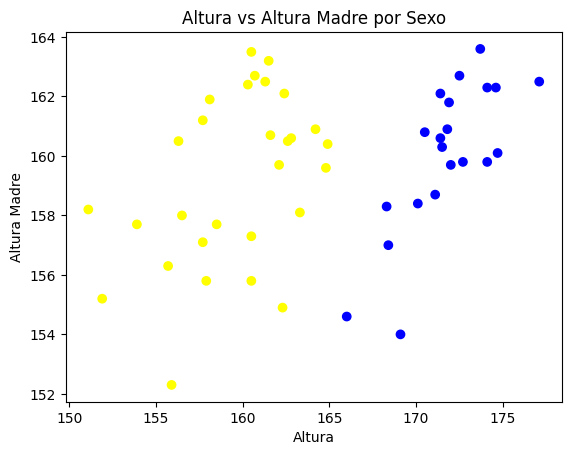

In [7]:
alturas = pd.read_csv("alturas.csv")
# Crear la columna de colores
colores = ['blue' if sexo == 'M' else 'yellow' for sexo in alturas['sexo']]

# Graficar
plt.scatter(alturas['altura'], alturas['altura_madre'], c=colores)
plt.xlabel('Altura')
plt.ylabel('Altura Madre')
plt.title('Altura vs Altura Madre por Sexo')
plt.show()


-24786.15548911307


<BarContainer object of 3 artists>

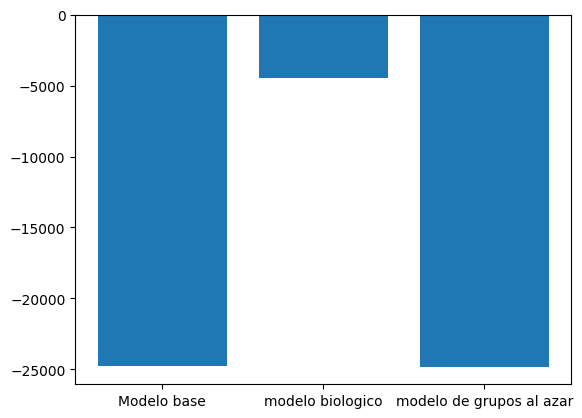

In [8]:
rptasMbase = np.array(alturas[["altura"]])
datosMbase = pd.DataFrame(alturas[["altura_madre"]])
datosMbase["unos"] = 1

mlmodelobase=ml.log_evidence(rptasMbase,datosMbase,10e-6,(1/0.2)**2)

rptasMBiologico = np.array(alturas[["altura"]])
datosMBiologico= pd.DataFrame(alturas[["altura_madre"]])
datosMBiologico["unos"] = 1
datosMBiologico['parametroSexo'] = [1 if sexo == 'M' else 0 for sexo in alturas['sexo']]

mlmodelobiologico=ml.log_evidence(rptasMBiologico,datosMBiologico,10e-6,(1/0.2)**2)


rptasMgruposAlAzar = np.array(alturas[["altura"]])
datosMgruposAlAzar = pd.DataFrame(alturas[["altura_madre"]])
datosMBiologico["unos"] = 1
max_id = max(alturas['id'])
datosMBiologico['parametroFalopa'] = [id%(max_id/2) for id in alturas['id']]

mlmodeloGruposAlAzar = ml.log_evidence(rptasMgruposAlAzar,datosMgruposAlAzar,10e-6,(1/0.2)**2)

print(mlmodelobase[0][0])
nombres_modelos = ['Modelo base', 'modelo biologico', 'modelo de grupos al azar']
logEvidencia_modelos = [mlmodelobase[0][0],mlmodelobiologico[0][0],mlmodeloGruposAlAzar[0][0]]
plt.bar(nombres_modelos,logEvidencia_modelos)


In [11]:
t = np.array(alturas['altura'])
unos = np.ones((alturas.shape[0], 1))
phiMbase = pd.DataFrame(alturas['altura_madre'])
phiMbase['unos'] = 1
phiMbase = phiMbase.values
predicmbase = ml.log_evidence(t,phiMbase)
media_geom_m_base = predicmbase**(1/len(phiMbase[0]))


phiMBiologico = pd.DataFrame(alturas['altura_madre'])
phiMBiologico['unos'] = 1
sexo =alturas['sexo'].map({'M': 1, 'F': 0})
phiMBiologico['sexo'] = sexo
phiMBiologico = phiMBiologico.values
predicMBiologico = ml.log_evidence(t,phiMBiologico)
media_geom_MBiologico = predicMBiologico**(1/len(phiMBiologico[0]))


phiMgruposAlAzar = pd.DataFrame(alturas['altura_madre'])
phiMgruposAlAzar['unos'] = 1
factorid=alturas['id']%(max_id/2)
phiMgruposAlAzar['factorraro'] = factorid
phiMgruposAlAzar = phiMgruposAlAzar.values
predicMgruposAlAzar = ml.log_evidence(t,phiMgruposAlAzar)
media_geom_MgruposAlAzar = predicMgruposAlAzar**(1/len(phiMgruposAlAzar[0]))

<ipython-input-11-22915fb7d2c3>:7: RuntimeWarning: invalid value encountered in scalar power
  media_geom_m_base = predicmbase**(1/len(phiMbase[0]))
<ipython-input-11-22915fb7d2c3>:16: RuntimeWarning: invalid value encountered in scalar power
  media_geom_MBiologico = predicMBiologico**(1/len(phiMBiologico[0]))
<ipython-input-11-22915fb7d2c3>:25: RuntimeWarning: invalid value encountered in scalar power
  media_geom_MgruposAlAzar = predicMgruposAlAzar**(1/len(phiMgruposAlAzar[0]))


In [10]:
m_pos_base, s_pos_base = ml.posterior(t,phiMbase)
m_pos_biolo, s_pos_biolo = ml.posterior(t,phiMBiologico)
m_pos_el_otro, s_pos_el_otro = ml.posterior(t,phiMgruposAlAzar)
